In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('seaborn-poster')

In [2]:
import numpy as np

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

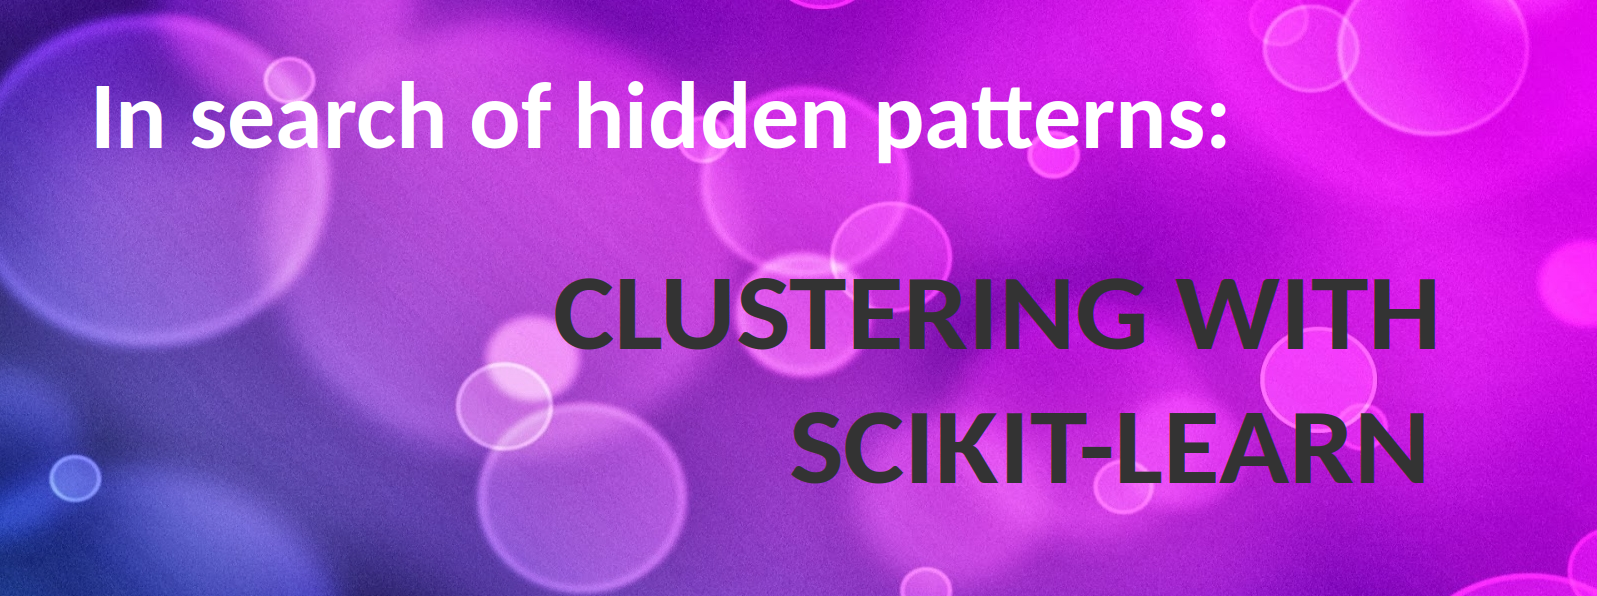

In [5]:
from IPython.display import Image
Image('./pics/Title.png', width='100%')

---------

# Machine learning

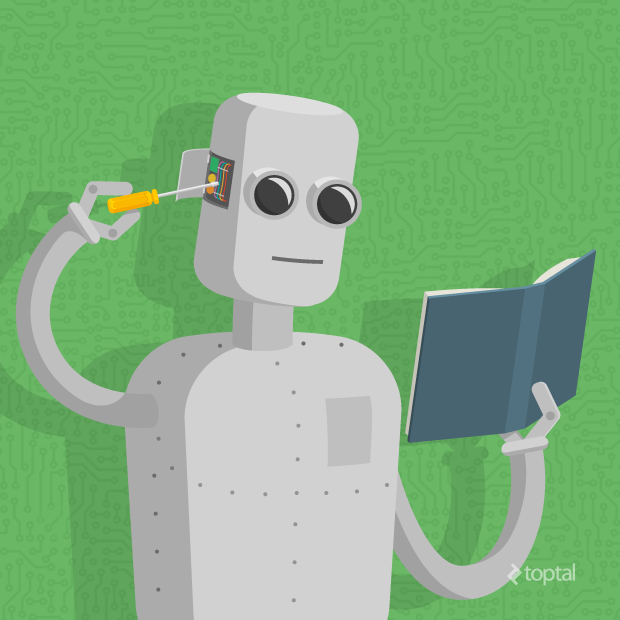

In [6]:
Image('./pics/ML.png', width='50%')

---------------

# Supervised learning, features, and labels

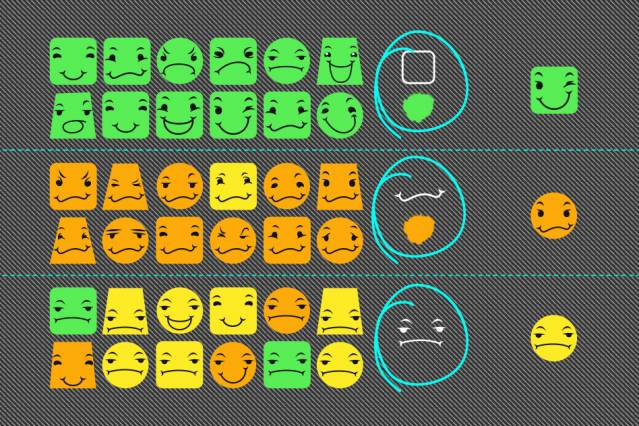

In [9]:
Image('./pics/SL.jpg', width='60%')

---------

# What is clustering? Why clustering?

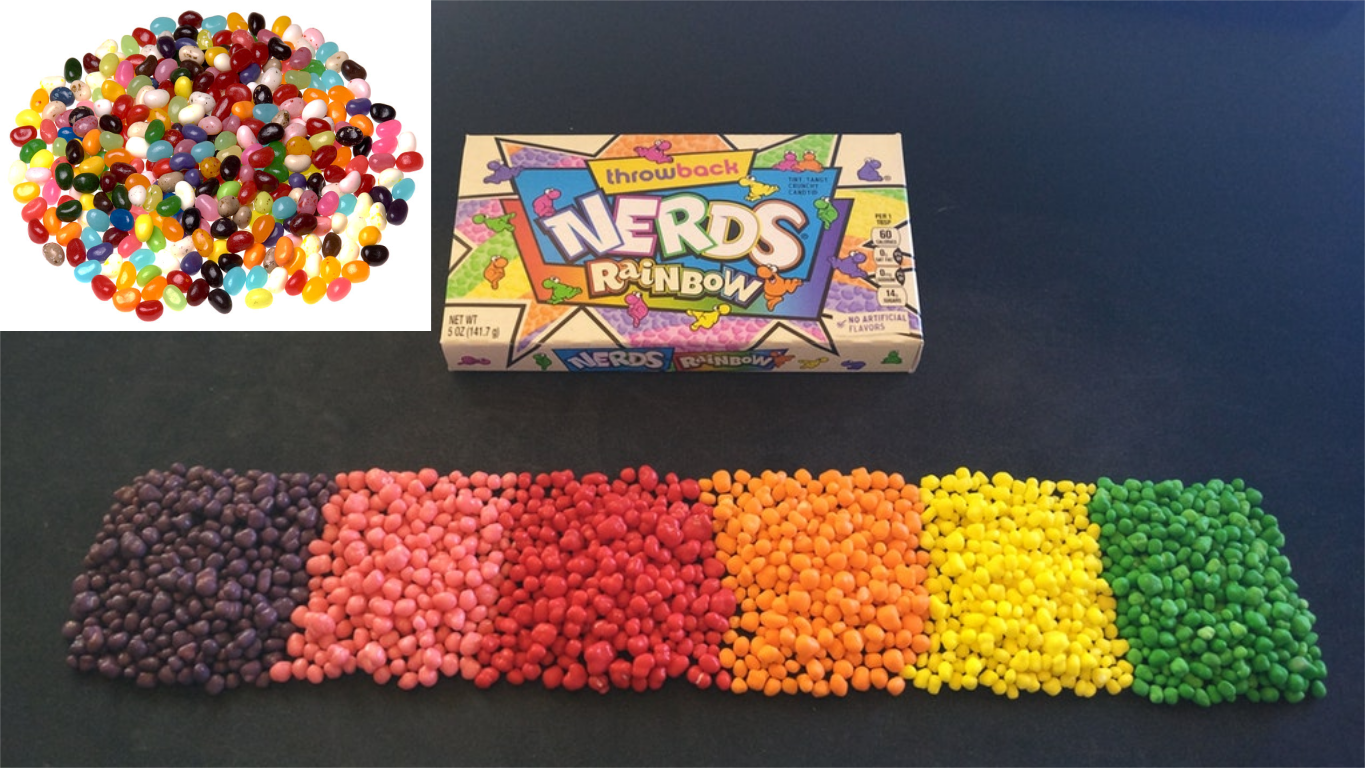

In [10]:
Image('./pics/JB.png', width='80%')

------------------

# Getting the data: the IRIS story

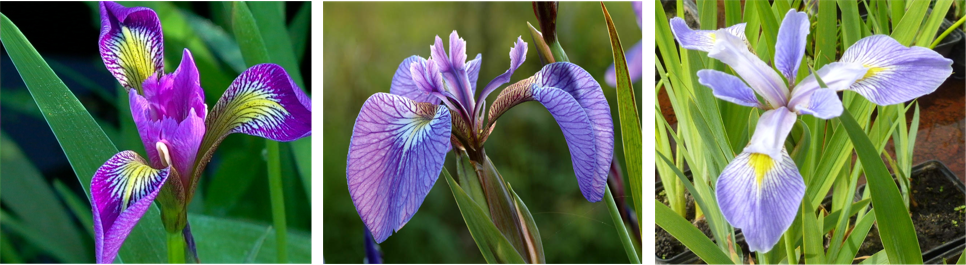

In [11]:
Image('./pics/iris.png', width='100%')

# IRIS dataset

In [9]:
from sklearn import datasets
Iris = datasets.load_iris()
Iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [10]:
Iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
Iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [12]:
Iris['data'].shape

(150, 4)

In [13]:
Iris['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

# Visualization 

# 1-D 

sepal length (cm)


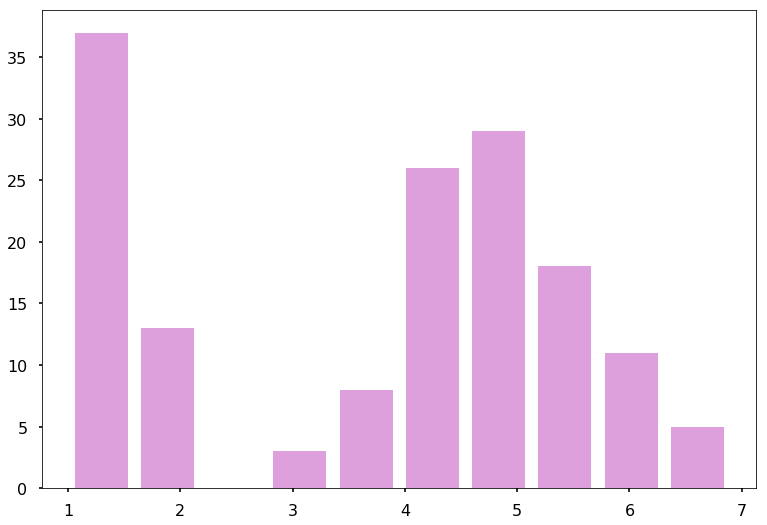

In [14]:
plt.hist(Iris['data'][:, 2], rwidth=.8, color='plum'); print(Iris['feature_names'][0])

# 2-D

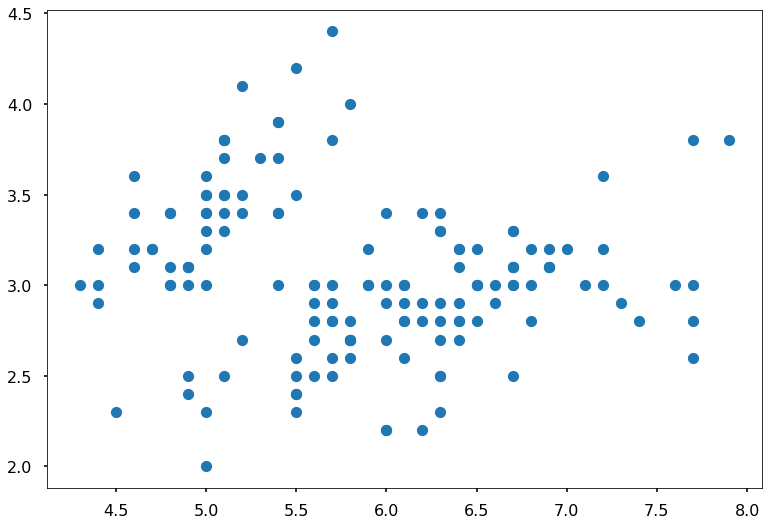

In [15]:
plt.plot(Iris['data'][:, 0], Iris['data'][:, 1], 'o');

# 3-D

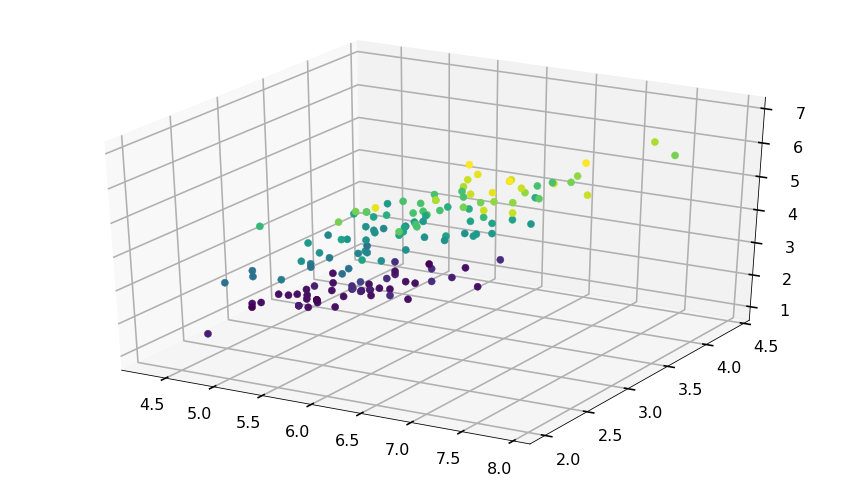

In [16]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(15, 8.5)).add_subplot(111, projection='3d')
ax.scatter(Iris['data'][:, 0], Iris['data'][:, 1], Iris['data'][:, 2], c=Iris['data'][:, 3], marker = 'o', depthshade=False, s=50);

## Improving the 2-D view: Principal Component Analysis (PCA)

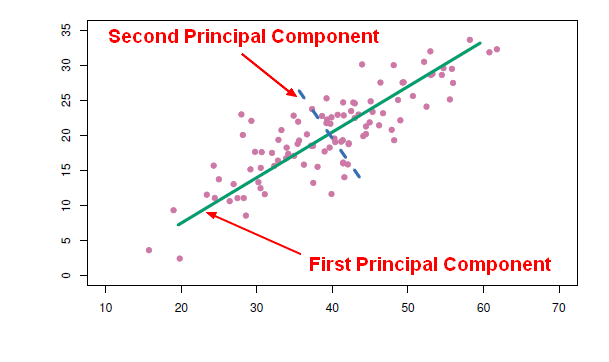

In [12]:
Image('./pics/PCA.png', width='60%')

In [18]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2).fit_transform(Iris['data'])
print Iris['data'][:4]
print pca_data[:4]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]]
[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]]


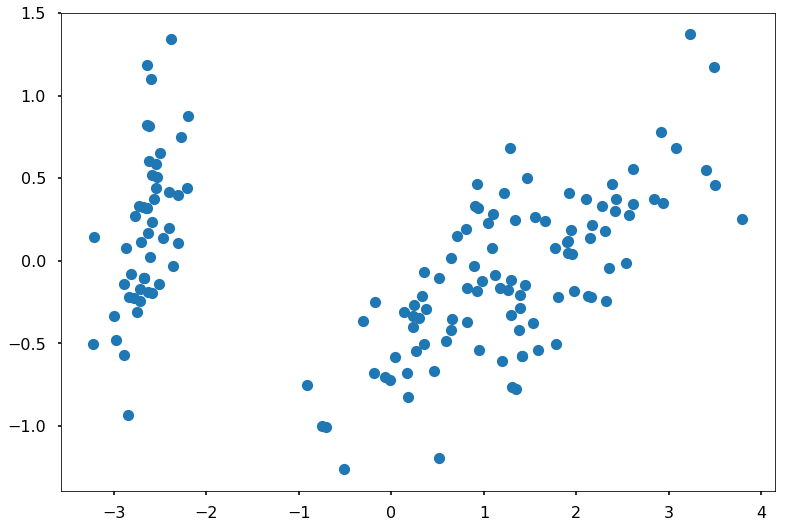

In [19]:
plt.plot(pca_data[:, 0], pca_data[:, 1], 'o');


## The Scikit-Learn API

In [20]:
targets = Iris.target
targets[25:75]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(Iris['data'][25:75,:], targets[25:75])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
predictions = lr.predict(Iris['data'][75:100,:])
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

---------------------

# Clustering with Scikit-learn

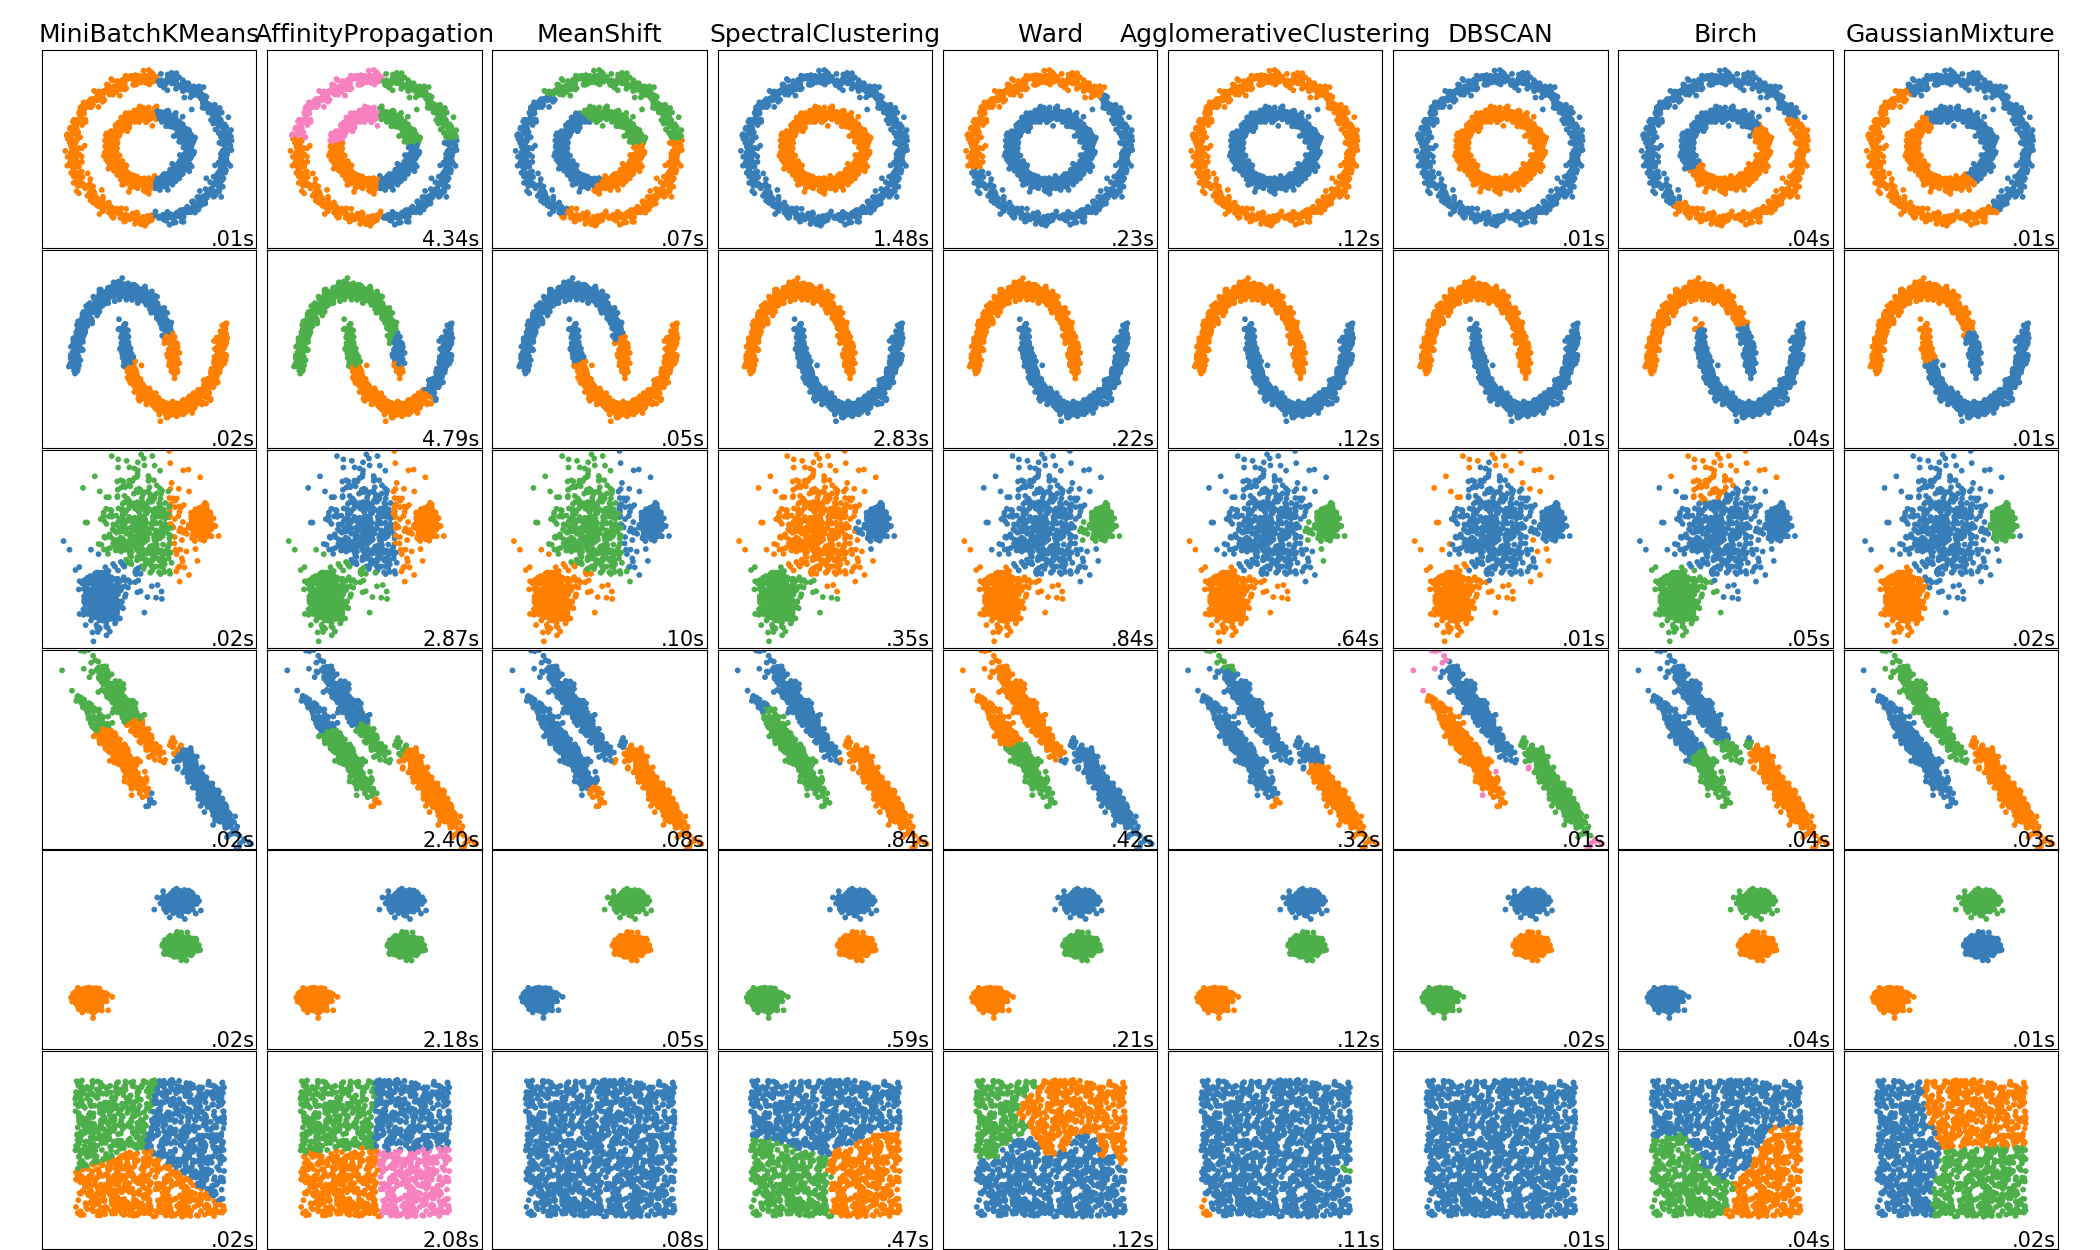

In [13]:
Image('./pics/cluster_comp.png')

In [24]:
from sklearn.cluster import KMeans, SpectralClustering, MeanShift, AgglomerativeClustering, DBSCAN

In [25]:
help(MeanShift)

Help on class MeanShift in module sklearn.cluster.mean_shift_:

class MeanShift(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  Mean shift clustering using a flat kernel.
 |  
 |  Mean shift clustering aims to discover "blobs" in a smooth density of
 |  samples. It is a centroid-based algorithm, which works by updating
 |  candidates for centroids to be the mean of the points within a given
 |  region. These candidates are then filtered in a post-processing stage to
 |  eliminate near-duplicates to form the final set of centroids.
 |  
 |  Seeding is performed using a binning technique for scalability.
 |  
 |  Read more in the :ref:`User Guide <mean_shift>`.
 |  
 |  Parameters
 |  ----------
 |  bandwidth : float, optional
 |      Bandwidth used in the RBF kernel.
 |  
 |      If not given, the bandwidth is estimated using
 |      sklearn.cluster.estimate_bandwidth; see the documentation for that
 |      function for hints on scalability (see also the Notes, below).
 |  
 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


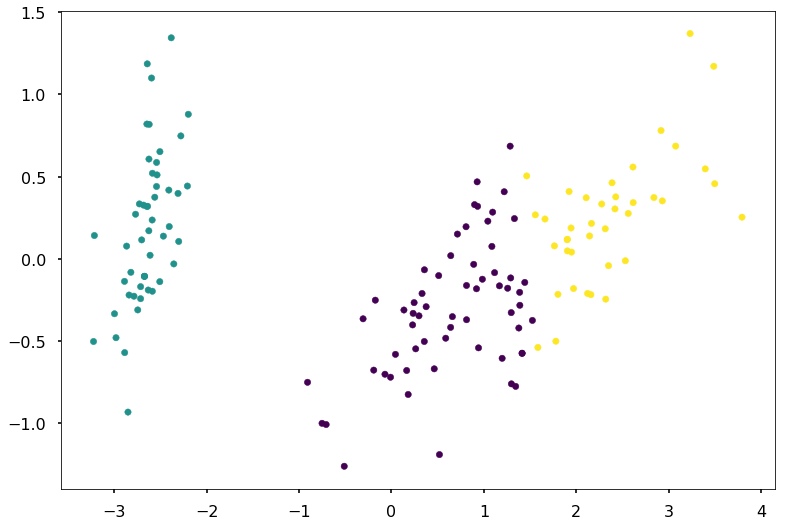

In [26]:
ms = MeanShift(bandwidth=.85)
ms.fit_predict(Iris['data'])
y_pred = ms.labels_
print(y_pred)
plt.scatter(pca_data[:, 0], pca_data[:, 1], s=40, c=y_pred)

----------------------------------------

# Evaluating our clustering

## Performance measures 

In [14]:
from IPython.display import IFrame
IFrame('./pics/PerfScores.pdf', width=1000, height=600)

In [28]:
from sklearn import metrics

In [29]:
metrics.adjusted_rand_score(Iris.target, y_pred)

0.74368263194323569

In [30]:
metrics.v_measure_score(Iris.target, y_pred)

0.7660355440487252

In [31]:
metrics.silhouette_score(Iris.data, y_pred, metric='euclidean')

0.55092963495412794

----------

# Optimization

## > Find the clustering method which best suits your goal 

## > Find the optimal parameter set for your algorithm 

CPU times: user 7.92 s, sys: 20 ms, total: 7.94 s
Wall time: 7.58 s


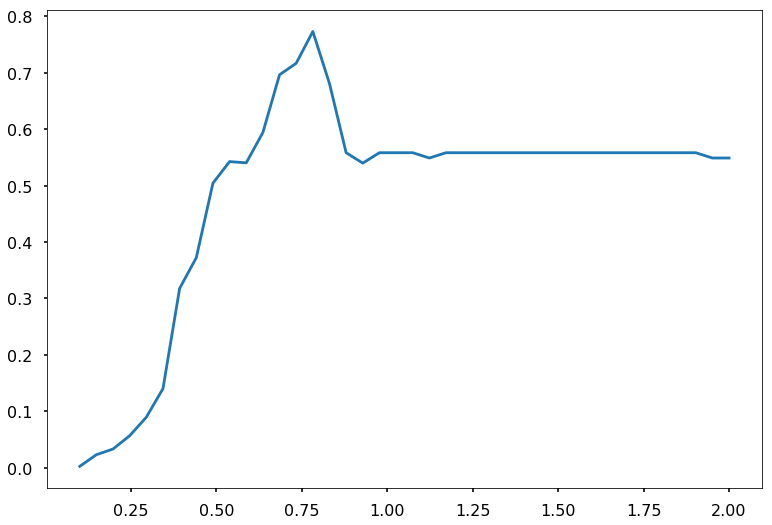

In [32]:
%%time
np.linspace(0.1, 1, 20)
bandwidths, size_results = np.linspace(0.1, 2, 40), []
for b in bandwidths:
    y_pred = MeanShift(bandwidth=b).fit_predict(Iris['data'])
    ar_score = metrics.adjusted_rand_score(y_pred, Iris.target)
    size_results.append(ar_score)
plt.plot(bandwidths, size_results)

##  > Select features that create a more accurate clustering 

In [33]:
from sklearn.mixture import GaussianMixture
from itertools import chain, combinations
 
feat_results = []
for item in chain.from_iterable(combinations([0, 1, 2, 3], r) for r in range(1, 5)):
    X = Iris['data'][:, list(item)]
    y_pred = GaussianMixture(n_components=3).fit(X).predict(X)
    ar_score = metrics.adjusted_rand_score(y_pred, Iris.target)
    feat_results.append((item, ar_score))
feat_results

[((0,), 0.37713481444045477),
 ((1,), 0.13927441869790336),
 ((2,), 0.6844056129203071),
 ((3,), 0.88569703102812281),
 ((0, 1), 0.54734391414213113),
 ((0, 2), 0.77200388023232691),
 ((0, 3), 0.88313534865828514),
 ((1, 2), 0.6844056129203071),
 ((1, 3), 0.81775335138132366),
 ((2, 3), 0.92217670197659429),
 ((0, 1, 2), 0.75833845225394159),
 ((0, 1, 3), 0.83407504701145818),
 ((0, 2, 3), 0.94101225629242058),
 ((1, 2, 3), 0.88595019787306806),
 ((0, 1, 2, 3), 0.90387423177481241)]

----------------------------

# You may also want to visit: 

In [34]:
display(HTML("""<a href="http://scikit-learn.org/stable/documentation.html"><h2>Scikit-learn documentation</h2></a>"""))

In [35]:
display(HTML("""<a href="https://scipy2017.scipy.org/ehome/index.php?eventid=220975&"><h2>Scipy tutorials on Scikit-learn</h2></a>"""))

------------------------

## Inside K-Means clustering 

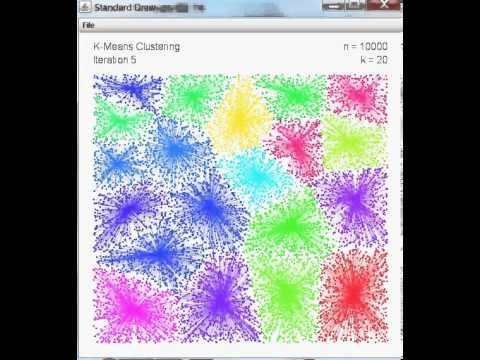

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo("BVFG7fd1H30", width=1024, height=576)